# Karhunen Louve Expansion
Author: Lohit Vandanapu
Date: August 20, 2018

In this example, the KL Expansion is used to generate stochastic processes from a prescribed Autocorrelation Function. This example illustrates how to use the KLE class for a one dimensional and compare the statistics of the generated stochastic processes with the expected values.

Import the necessary libraries. Here we import standard libraries such as numpy and matplotlib, but also need to import the KLE class from the StochasticProcesses module of UQpy.

In [1]:
from UQpy.stochastic_process import KarhunenLoeveExpansion
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

The input parameters necessary for the generation of the stochastic processes are given below:

In [2]:
n_sim = 10000  # Num of samples

m = 400 + 1
T = 1000
dt = T / (m - 1)
t = np.linspace(0, T, m)

Defining the Autocorrelation Function

In [3]:
# Target Covariance(ACF)
R = np.zeros([m, m])
for i in range(m):
    for j in range(m):
        R[i, j] = 2 * np.exp(-((t[j] - t[i]) / 281) ** 2)  # var = 2

In [4]:
KLE_Object = KarhunenLoeveExpansion(samples_number=n_sim, correlation_function=R, time_interval=dt)
samples = KLE_Object.samples

/Users/dimitris/PycharmProjects/dimtsap/UQpy/src/UQpy/stochastic_process/KarhunenLoeveExpansion.py:62: ComplexWarning: Casting complex values to real discards the imaginary part
  self.lam = lam.astype(np.float64)


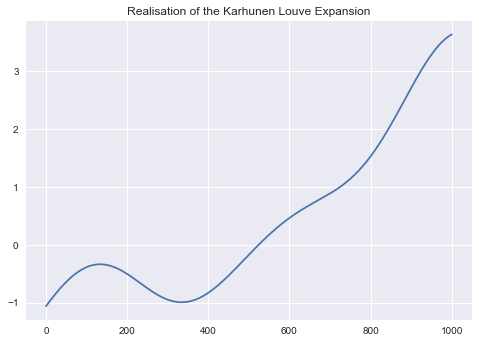

In [5]:
fig, ax = plt.subplots()
plt.title('Realisation of the Karhunen Louve Expansion')
plt.plot(t, samples[0, 0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

In [6]:
print('The mean of the samples is ', np.mean(samples), 'whereas the expected mean is 0.000')
print('The variance of the samples is ', np.var(samples), 'whereas the expected variance is 2.000')

The mean of the samples is  -0.003554788989534696 whereas the expected mean is 0.000
The variance of the samples is  1.9923714631970013 whereas the expected variance is 2.000
